In [1]:
%matplotlib notebook
import cartopy.crs as ccrs
import matplotlib.pyplot as plt

In [2]:
# check with mapx, this is UL corner of EASE-Grid 2.0 N!
# Answer should be lon=-135. lat=-84.634050
geod = ccrs.Geodetic()
e2n = ccrs.LambertAzimuthalEqualArea(central_latitude=90.0)
lon, lat = geod.transform_point(
    x = -9000000.,
    y = 9000000.,
    src_crs=e2n)
print(lon, lat)

-135.0 -84.6340496694687


In [3]:
# For e2s, answer should be lon=-45., lat=-84.634050
e2s = ccrs.LambertAzimuthalEqualArea(central_latitude=-90.0)
lon, lat = geod.transform_point(
    x = -9000000.,
    y = 9000000.,
    src_crs=e2s)
print(lon, lat)

-45.0 84.6340496694687


# Using cartopy's io shapefile interface to read Hunza basin shapefile

In [4]:
import cartopy.io.shapereader as shpreader
import shapely.geometry as sgeom

bfile = '/Users/brodzik/Desktop/GIS_data/basins/IN_Hunza_at_DainyorBridge.shp'

In [5]:
reader = shpreader.Reader(bfile)
record = next(reader.records())

In [ ]:
record

In [ ]:
record.attributes

In [ ]:
record.bounds

In [ ]:
record.geometry

In [ ]:
help(record)

# What does it mean to get a projected geometry?
# Converts the shapefile geod  to E2N?

In [6]:
e2n_basin = e2n.project_geometry(record.geometry)

<IPython.core.display.Javascript object>


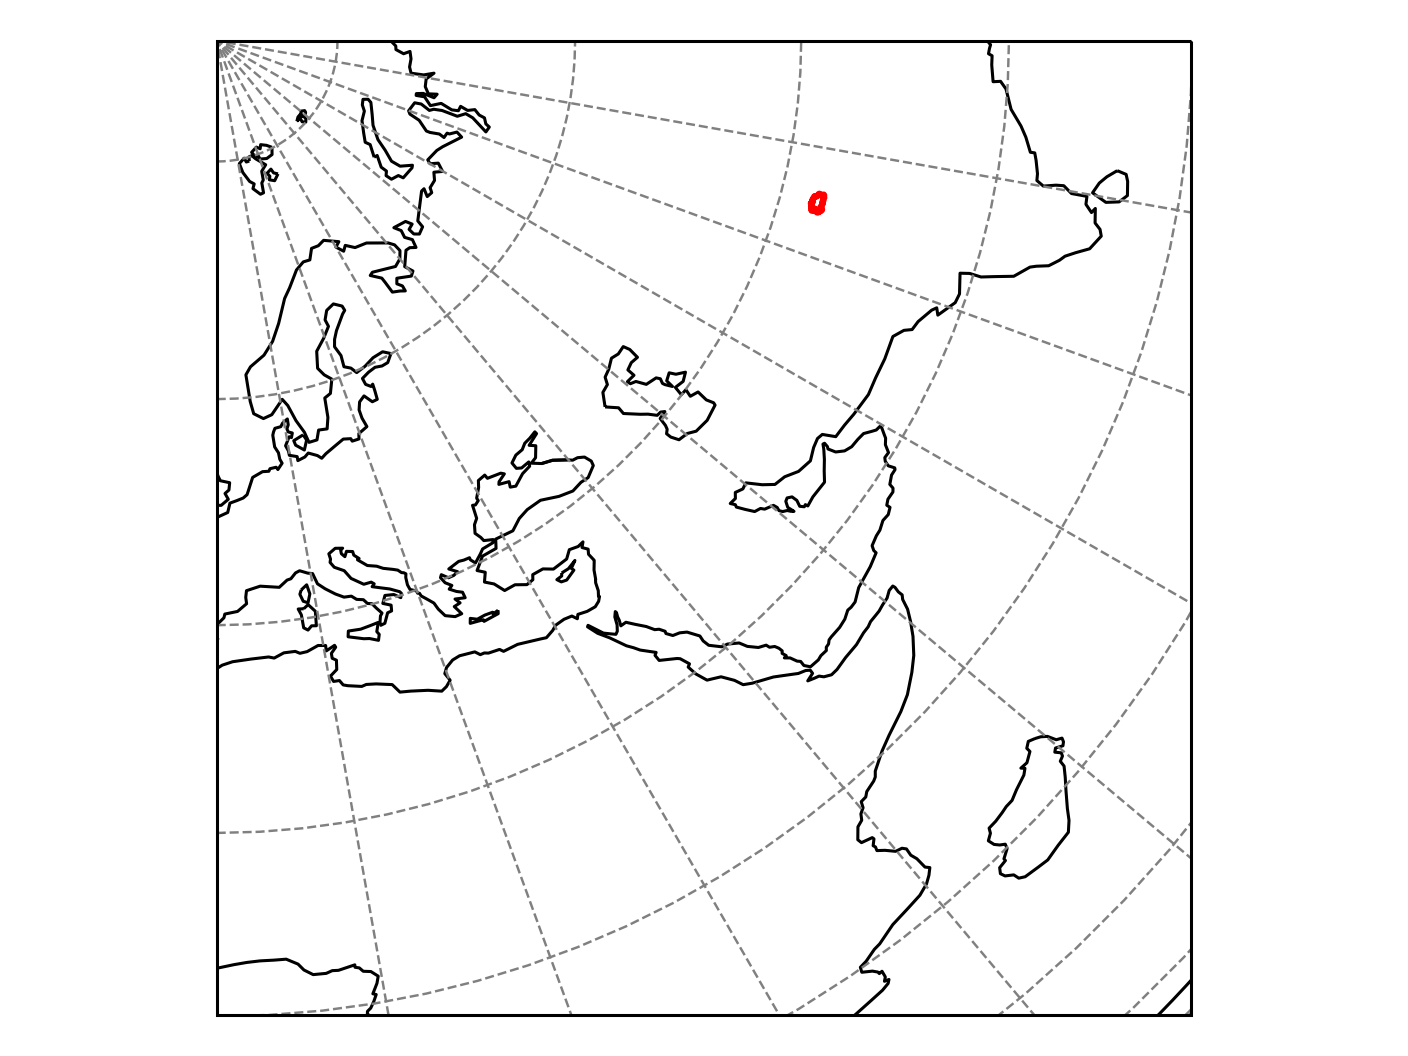

In [7]:
plt.figure()

ax = plt.axes(projection=e2n)
ax.set_extent([0., 9000000., -9000000., 0.], crs=e2n)
ax.gridlines(color='gray', linestyle='--')
ax.coastlines()

ax.add_geometries(
    [e2n_basin], e2n,
    edgecolors='red', facecolor='none', lw=2)


plt.tight_layout()
plt.show()


In [ ]:
from netCDF4 import Dataset

In [ ]:
cetbfile = '/Users/brodzik/cetb_data/v1.3/AQUA_AMSRE/2004164/NSIDC-0630-EASE2_N3.125km-AQUA_AMSRE-2004164-36H-M-SIR-RSS-v1.3.nc'
f = Dataset(cetbfile, 'r', 'netCDF4')
f

In [ ]:
import numpy as np
tb = np.squeeze(f.variables['TB'][:])
tb.shape

In [ ]:
plt.figure()

ax = plt.axes(projection=e2n)
extent = [-9000000., 9000000., -9000000., 9000000.] # [xmin, xmax, ymin, ymax] of UL corner
ax.set_extent(extent, crs=e2n)
ax.gridlines(color='gray', linestyle='--')
ax.coastlines()

ax.imshow(tb, extent=extent, transform=e2n, origin='upper')

ax.add_geometries(
    [e2n_basin], e2n,
    edgecolors='red', facecolor='none', lw=2)

plt.tight_layout()
plt.show()
